In [1]:
import numpy as np
from scipy import optimize
from scifit.solvers import FitSolver1D

In [2]:
class Model(FitSolver1D):
    @staticmethod
    def model(x, a, b, c):
        return a * x[:, 0]**2 + b * x[:, 0] + c

In [3]:
model = Model()

In [4]:
data = model.synthetic_dataset(parameters=(3,2,1), sigma=0.1)

In [5]:
sol1 = model.fit(data)

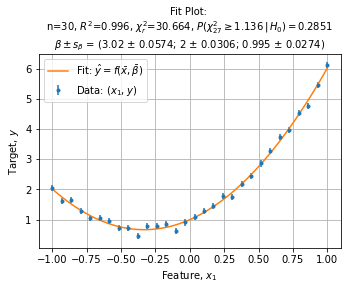

In [6]:
axe = model.plot_fit()

In [7]:
sol1["parameters"]

array([3.01710543, 2.00080084, 0.99472341])

In [8]:
sol1["covariance"]

array([[ 3.29272575e-03, -1.22229183e-11, -1.17327009e-03],
       [-1.22229183e-11,  9.35483859e-04,  8.58959144e-12],
       [-1.17327009e-03,  8.58959144e-12,  7.51395089e-04]])

In [9]:
optimize.curve_fit(Model.model, data[["x0"]].values, data["y"].values)

(array([3.01710543, 2.00080084, 0.99472341]),
 array([[ 3.73959710e-03,  2.31468658e-11, -1.33250012e-03],
        [ 2.31468658e-11,  1.06244278e-03, -1.26854872e-11],
        [-1.33250012e-03, -1.26854872e-11,  8.53370462e-04]]))

In [10]:
optimize.curve_fit(Model.model, data[["x0"]].values, data["y"].values, sigma=data["sy"].values)

(array([3.01710543, 2.00080084, 0.99472341]),
 array([[ 3.73959707e-03, -1.38817481e-11, -1.33250010e-03],
        [-1.38817481e-11,  1.06244278e-03,  9.75532535e-12],
        [-1.33250010e-03,  9.75532535e-12,  8.53370455e-04]]))

In [11]:
optimize.curve_fit(Model.model, data[["x0"]].values, data["y"].values, sigma=data["sy"].values, absolute_sigma=True)

(array([3.01710543, 2.00080084, 0.99472341]),
 array([[ 3.29272575e-03, -1.22229183e-11, -1.17327009e-03],
        [-1.22229183e-11,  9.35483859e-04,  8.58959144e-12],
        [-1.17327009e-03,  8.58959144e-12,  7.51395089e-04]]))

In [19]:
def loss_factory(x, y):
    def wrapped(beta):
        return np.sum(np.power(y - Model.model(x, *beta), 2))
    return wrapped

In [20]:
loss = loss_factory(data[["x0"]].values, data["y"].values)

In [22]:
optimize.minimize(loss, x0=[1,1])

TypeError: model() missing 1 required positional argument: 'c'

In [12]:
def residuals_factory(x, y):
    def wrapped(beta):
        return y - Model.model(x, *beta)
    return wrapped

In [13]:
residuals = residuals_factory(data[["x0"]].values, data["y"].values)

In [14]:
sol2 = optimize.least_squares(residuals, x0=[1, 1, 1])

In [15]:
U, s, Vh = np.linalg.svd(sol2.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(sol2.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]

In [16]:
cov

array([[ 3.29272575e-01, -1.01362051e-09, -1.17327009e-01],
       [-1.01362051e-09,  9.35483864e-02,  2.56668515e-10],
       [-1.17327009e-01,  2.56668515e-10,  7.51395091e-02]])

In [17]:
sol3 = optimize.leastsq(residuals, x0=[1, 1, 1], full_output=True)

In [18]:
sol3

(array([3.01710543, 2.00080084, 0.99472341]),
 array([[ 3.29272578e-01,  2.03808805e-09, -1.17327011e-01],
        [ 2.03808805e-09,  9.35483864e-02, -1.11696072e-09],
        [-1.17327011e-01, -1.11696072e-09,  7.51395095e-02]]),
 {'fvec': array([ 0.03611552, -0.12790279,  0.13652554, -0.03611299, -0.07517204,
          0.08717505,  0.08582681, -0.06253789,  0.00376787, -0.2211492 ,
          0.11888121,  0.10366787,  0.1002386 , -0.1969491 , -0.02812387,
          0.00544048,  0.04555604,  0.03353923,  0.13620248, -0.15130999,
         -0.01775287, -0.06411669,  0.01962814,  0.05427294,  0.12922454,
         -0.05120352,  0.06143732, -0.18982863, -0.02860729,  0.09326724]),
  'nfev': 9,
  'fjac': array([[ 5.47722560e+00,  1.82574186e-01,  1.82574186e-01,
           1.82574186e-01,  1.82574183e-01,  1.82574185e-01,
           1.82574185e-01,  1.82574185e-01,  1.82574185e-01,
           1.82574185e-01,  1.82574185e-01,  1.82574185e-01,
           1.82574185e-01,  1.82574185e-01,  1.825